<a href="https://colab.research.google.com/github/aounallahsara/ML_models/blob/main/Logisitc_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


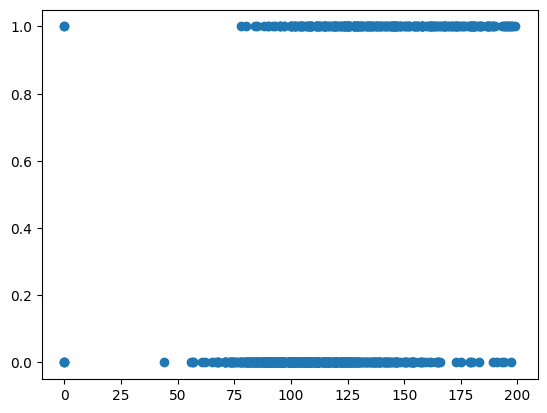

In [ ]:
plt.scatter(data['Glucose'], data['Outcome'])

In [ ]:
# split target & features
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
# standarize
from sklearn.preprocessing import StandardScaler
features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
scaler_z =StandardScaler()

standarized_x = x.copy()
standarized_x[features] = scaler_z.fit_transform(x[features])
standarized_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,8,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,1,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
# split data to train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(standarized_x, y, test_size=0.2, random_state=42)

In [ ]:
# creation & training model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = log_reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"error (MAE): {mae}")

error (MAE): 0.24675324675324675


In [ ]:
# regularization for classification
# l2
model_l2 = LogisticRegression(penalty='l2', C=1.0)
model_l2.fit(x_train, y_train)
y_pred = model_l2.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"model l2 error (MAE): {mae}")

model l2 error (MAE): 0.24675324675324675


In [ ]:
# l1
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(x_train, y_train)
y_pred = model_l1.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"model l2 error (MAE): {mae}")

model l2 error (MAE): 0.2532467532467532


array([[78, 21],
       [18, 37]])

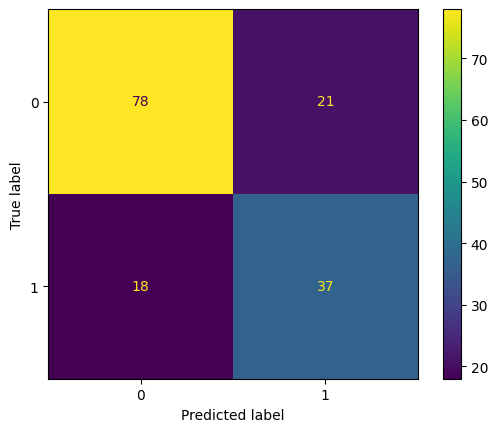

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(mat).plot()
mat

In [ ]:
accuracy = (79 + 37) / (79 + 20+ 18 + 37)
accuracy*100

75.32467532467533